<a href="https://colab.research.google.com/github/GulzhanIsaeva/AI_Part2_12194812/blob/main/Week9_lab(1_1%2C_1_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting House Prices with DNN

## Importing needed library and dataset


*   In order to predict the prices of houses, first of all, we should download the dataset.
*   Boston Housing dataset is included in Keras, so we can easily access it using **keras.datasets.boston_housing**

*   Then we standardize the training
and test dataset by using **mean** and **standard deviation** from the training data

* The parameter **axis=0** ensures
that we compute the mean and standard deviation for each input variable
separately



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 500
BATCH_SIZE = 16

# READ AND STANDIRDIZE THE DATA
boston_housing = keras.datasets.boston_housing
(raw_x_train, y_train), (raw_x_test, y_test) = boston_housing.load_data()
x_mean = np.mean(raw_x_train, axis=0)
x_stddev = np.std(raw_x_train, axis=0)
x_train =(raw_x_train - x_mean) / x_stddev
x_test =(raw_x_test - x_mean) / x_stddev

57026/57026 [==============================] - 0s 0us/step


## Creating and Training the Model

*   Here we create and then train the model
*    First instantiate the model object
without any layers, and then add them one by one using the member
method **add()**

* For deep models the code typically gets more readable and maintainable when layers are added one by one

* One of the example of Deep model identical
layers can be the model added with a **for** loop, which
makes for a much more compact model description.

* Our network to have two hidden layers, so we are now officially
doing DL!

* Adding more layers can lead to better-performing (from an
accuracy perspective) networks.

* The two hidden layers in our network implementation have 64 ReLU
neurons each, where the first layer is declared to have 13 inputs to match
the dataset.

* The output layer consists of a single neuron with a linear
activation function.

* We use MSE as the loss function and use the Adam
optimizer.

* We tell the **compile** method that we are interested in seeing the
metric mean absolute error.

* The difference between the **loss** argument and
the **metrics** argument is that the former is used by the backpropagation
algorithm to compute the gradient, and the latter is just being printed out
for our information.






In [ ]:
# CREATE AND TRAIN MODEL
model = Sequential()
model.add(Dense(64, activation='r elu', input_shape=[13]))
model.add(Dense(64, activation='relu')) # we are now doing DL
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 - 3s - loss: 526.6707 - mean_absolute_error: 21.1597 - val_loss: 482.6923 - val_mean_absolute_error: 20.2628 - 3s/epoch - 103ms/step
Epoch 2/500
26/26 - 0s - loss: 382.2509 - mean_absolute_error: 17.7565 - val_loss: 293.3660 - val_mean_absolute_error: 15.2990 - 91ms/epoch - 4ms/step
Epoch 3/500
26/2

## Printing the Results

* We print out a summary of the model with **model.summary()**
* Then we start training
* After the training is done, we use our model to predict the price
for the entire test set and then print out the first four predictions

* the predictions
for the first four test examples are as follows:
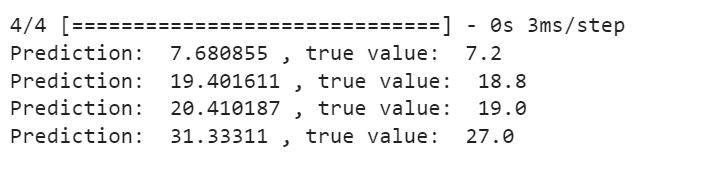

In [ ]:
# Print first 4 predictions
predictions = model.predict(x_test)
for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

4/4 [==============================] - 0s 3ms/step
Prediction:  7.680855 , true value:  7.2
Prediction:  19.401611 , true value:  18.8
Prediction:  20.410187 , true value:  19.0
Prediction:  31.33311 , true value:  27.0
